In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2022-10-18 14:30:03.659874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 14:30:03.659926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 14:30:03.805847: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 14:30:06.763968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-18 14:30:06.764098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [103]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [104]:
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [105]:
date_time.head

<bound method NDFrame.head of 5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]>

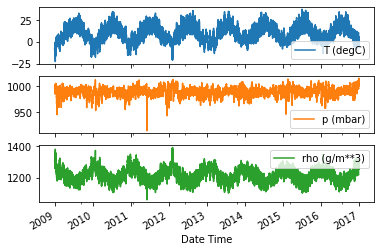

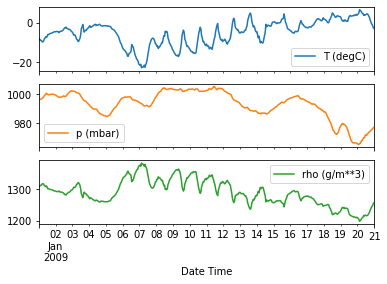

In [106]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [9]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,1.702567,2.963041,174.789095
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,65.447512,75.597657,86.619431
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


In [10]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

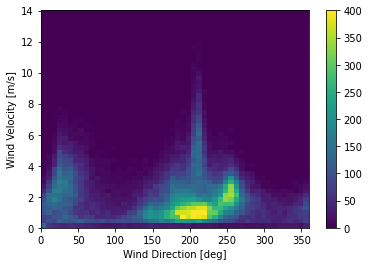

In [11]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [12]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

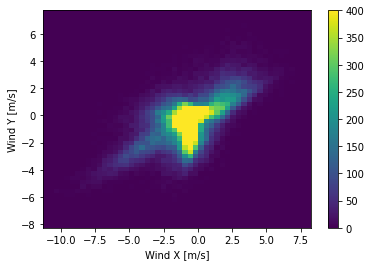

In [13]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [14]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [15]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

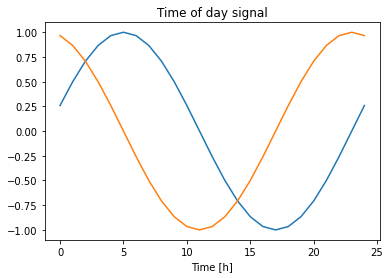

In [16]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

2022-10-17 09:35:11.839027: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-17 09:35:11.839959: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-17 09:35:11.840097: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harold-pc): /proc/driver/nvidia/version does not exist


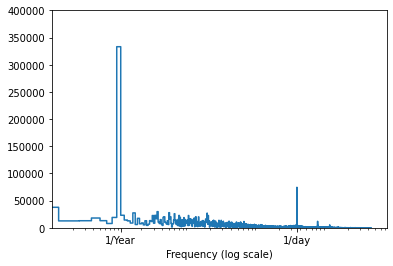

In [17]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [108]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [110]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [111]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,-1.266853,-1.263871,0.221831
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,-1.240790,-1.263871,0.194434
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,-1.286400,-1.263871,-0.069265
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,-1.338526,-1.371630,0.761784
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,-1.143054,-1.156113,-0.185703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294353,0.169167,0.904892,0.886564,1.571997,0.947972,0.776492,1.984916,-0.493604,1.979016,1.977352,-0.882480,0.485880,0.412852,0.890779
294359,0.266787,0.879473,0.853325,1.405624,0.621793,0.742703,1.680752,-0.283962,1.672043,1.672192,-0.822662,0.322986,0.068025,0.438725
294365,0.217374,0.740824,0.719224,1.425703,1.086900,0.559461,1.716396,-0.605690,1.709479,1.707403,-0.716211,-0.817267,-0.992320,-0.416296
294371,0.213759,0.710783,0.689423,1.412795,1.147303,0.521772,1.692633,-0.645127,1.687018,1.683929,-0.689842,-0.888941,-0.776803,0.582561


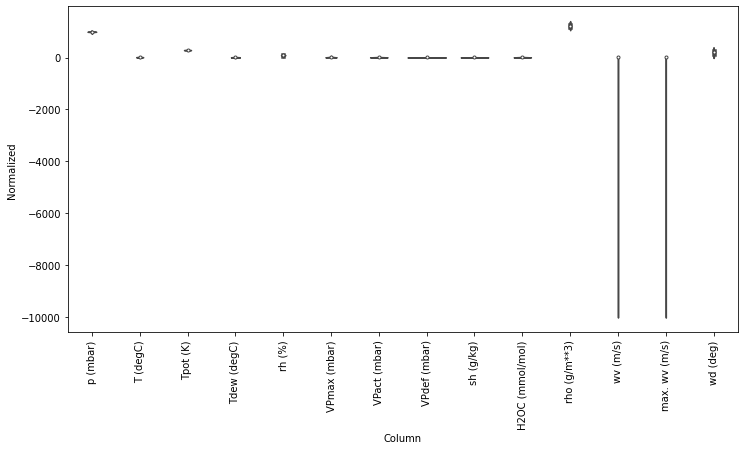

In [112]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)


In [22]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [23]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [24]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

In [25]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [26]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


In [27]:
w2.example = example_inputs, example_labels

In [29]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

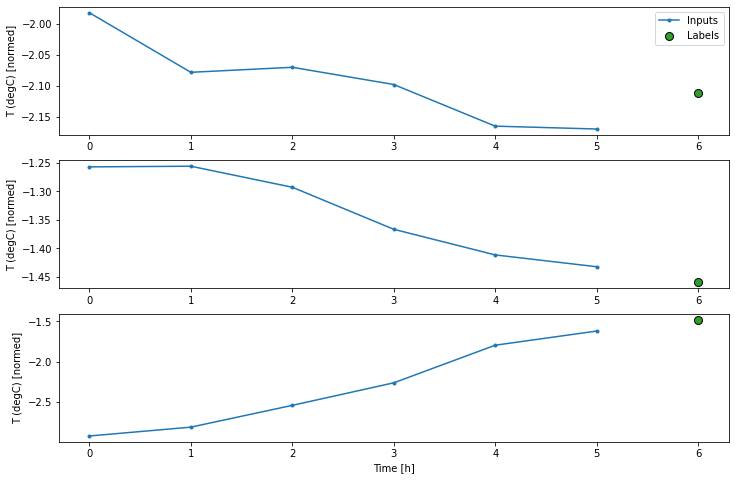

In [30]:
w2.plot()

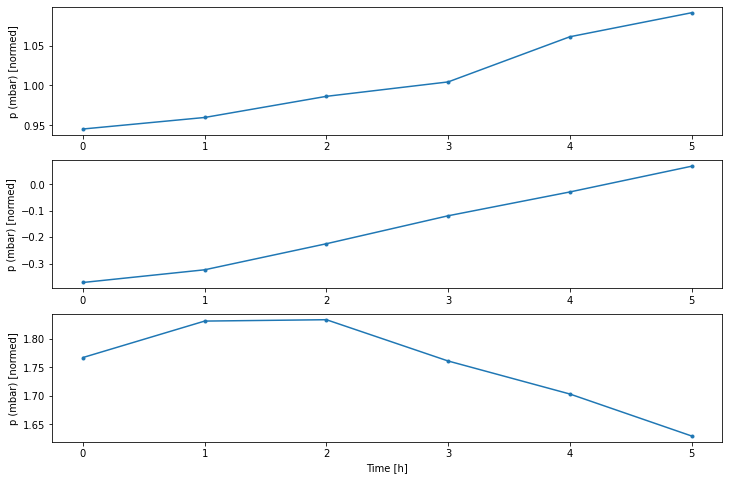

In [31]:
w2.plot(plot_col='p (mbar)')

In [32]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [33]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [34]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [35]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [36]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [37]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [38]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
              return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [39]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 2s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0785


In [40]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [41]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


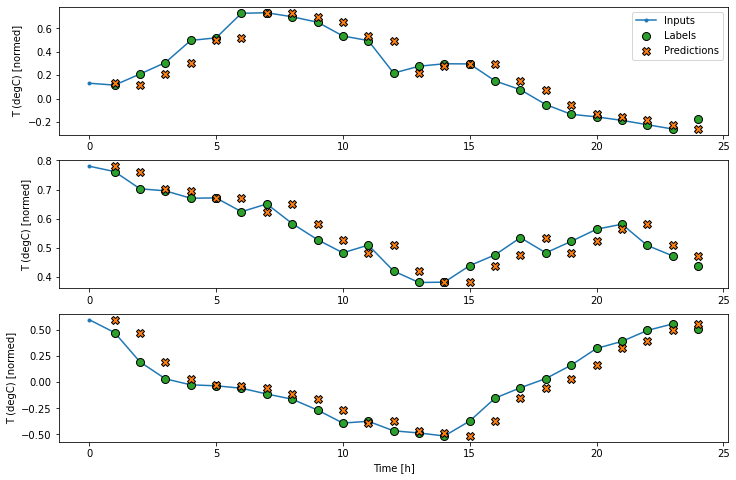

In [42]:
wide_window.plot(baseline)

In [43]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [44]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [45]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [46]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 12s 7ms/step - loss: 0.3633 - mean_absolute_error: 0.3419 - val_loss: 0.0338 - val_mean_absolute_error: 0.1433
Epoch 2/20
1534/1534 [==============================] - 13s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.1216 - val_loss: 0.0140 - val_mean_absolute_error: 0.0889
Epoch 3/20
1534/1534 [==============================] - 15s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0808 - val_loss: 0.0095 - val_mean_absolute_error: 0.0722
Epoch 4/20
1534/1534 [==============================] - 18s 12ms/step - loss: 0.0096 - mean_absolute_error: 0.0721 - val_loss: 0.0092 - val_mean_absolute_error: 0.0708
Epoch 5/20
1534/1534 [==============================] - 22s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0716 - val_loss: 0.0094 - val_mean_absolute_error: 0.0719
Epoch 6/20
439/439 [==============================] - 3s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0725


In [47]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


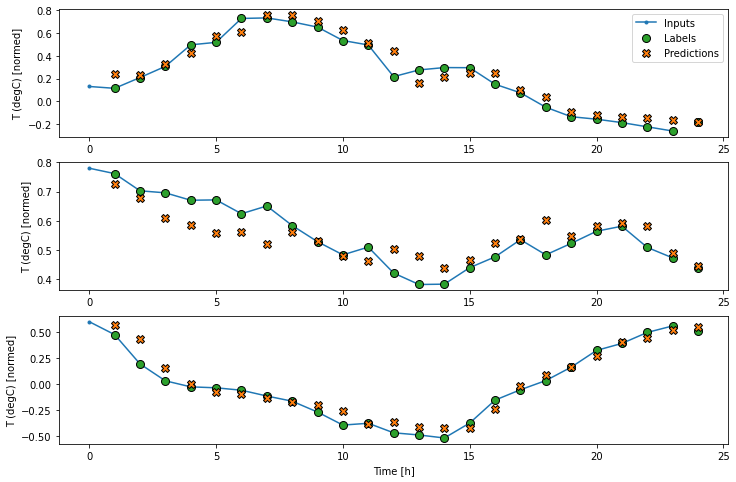

In [48]:
wide_window.plot(linear)

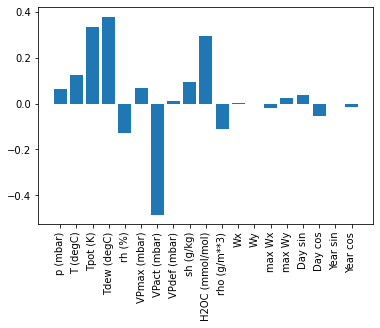

In [49]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [50]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 16s 10ms/step - loss: 0.0171 - mean_absolute_error: 0.0812 - val_loss: 0.0077 - val_mean_absolute_error: 0.0638
Epoch 2/20
1534/1534 [==============================] - 15s 10ms/step - loss: 0.0078 - mean_absolute_error: 0.0644 - val_loss: 0.0089 - val_mean_absolute_error: 0.0711
Epoch 3/20
1534/1534 [==============================] - 16s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0624 - val_loss: 0.0071 - val_mean_absolute_error: 0.0608
Epoch 4/20
1534/1534 [==============================] - 18s 12ms/step - loss: 0.0072 - mean_absolute_error: 0.0607 - val_loss: 0.0069 - val_mean_absolute_error: 0.0585
Epoch 5/20
1534/1534 [==============================] - 23s 15ms/step - loss: 0.0071 - mean_absolute_error: 0.0600 - val_loss: 0.0071 - val_mean_absolute_error: 0.0593
Epoch 6/20
439/439 [==============================] - 2s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0639


In [51]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

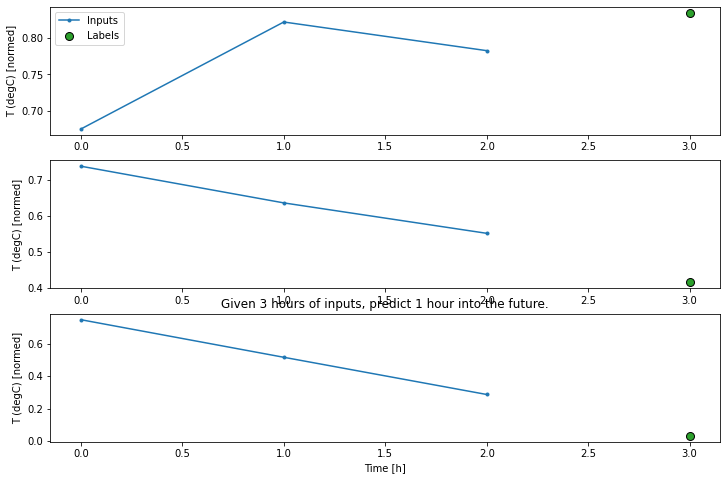

In [52]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [53]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [54]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [55]:
multi_val_performance = {}
multi_performance = {}
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0566


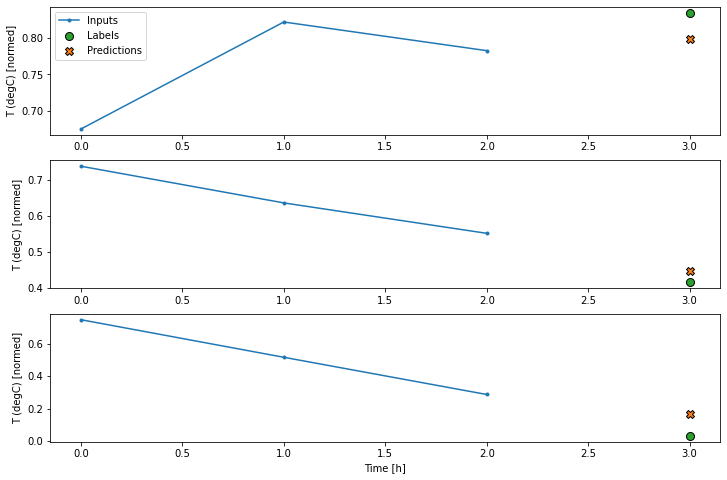

In [56]:
conv_window.plot(multi_step_dense)

In [57]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 19)

ValueError:Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 57, but received input with shape (32, 456)

Call arguments received by layer "sequential_2" "                 f"(type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 19), dtype=float32)
  • training=None
  • mask=None


In [58]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [59]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [60]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0579


In [61]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [62]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [63]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


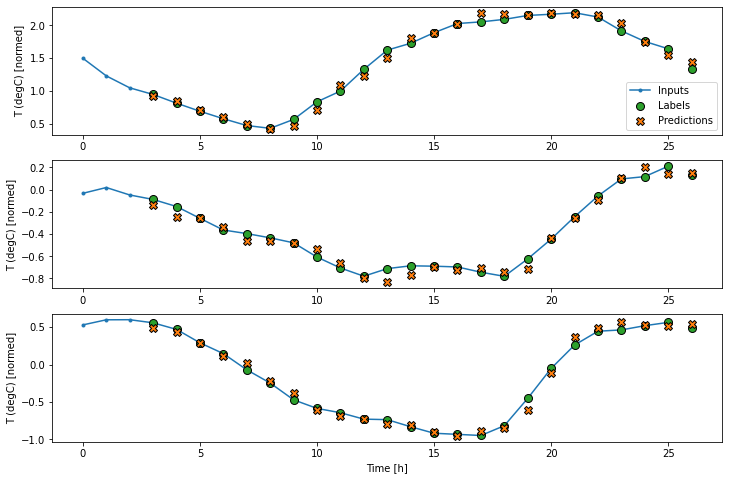

In [64]:
wide_conv_window.plot(conv_model)

In [65]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [66]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [67]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 4s 10ms/step - loss: 0.0055 - mean_absolute_error: 0.0507


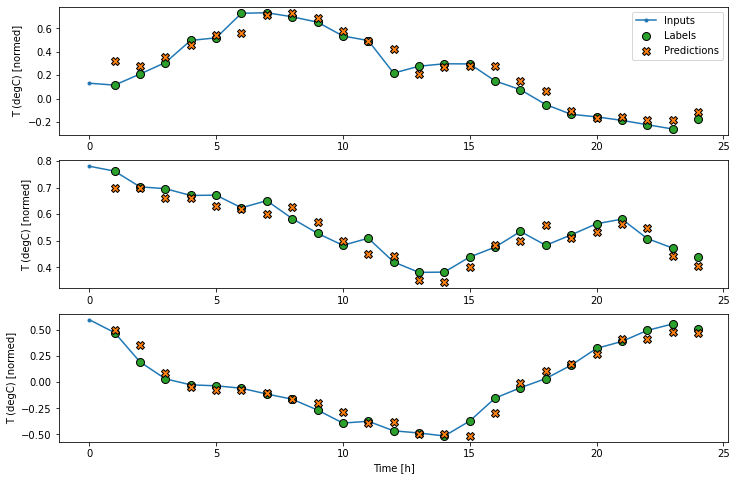

In [68]:
wide_window.plot(lstm_model)

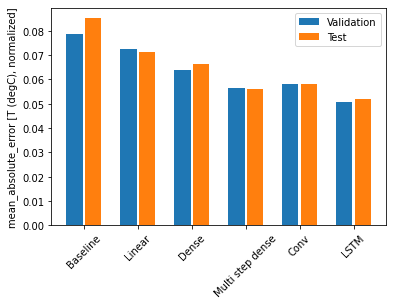

In [69]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [70]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0852
Linear      : 0.0714
Dense       : 0.0662
Multi step dense: 0.0560
Conv        : 0.0579
LSTM        : 0.0518


In [71]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [72]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

438/438 [==============================] - 4s 10ms/step - loss: 0.0058 - mean_absolute_error: 0.0524

CPU times: user 26min 9s, sys: 2min 28s, total: 28min 38s
Wall time: 12min 29s


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

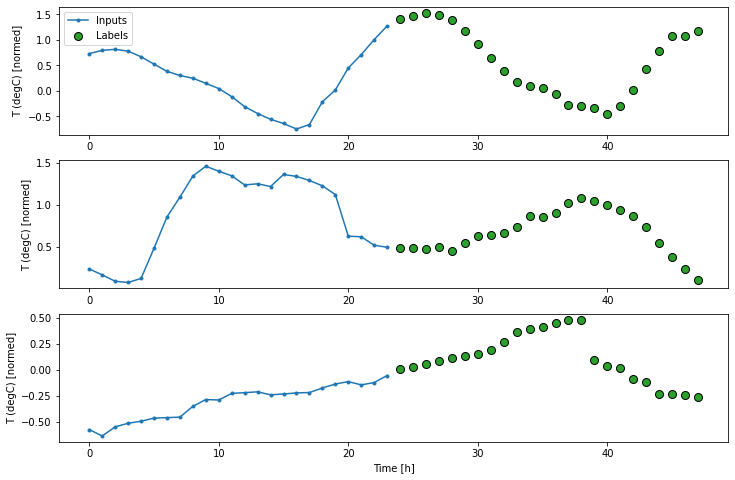

In [77]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [75]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [78]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [79]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [80]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [81]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 19)


437/437 [==============================] - 6s 14ms/step - loss: 0.2248 - mean_absolute_error: 0.3005


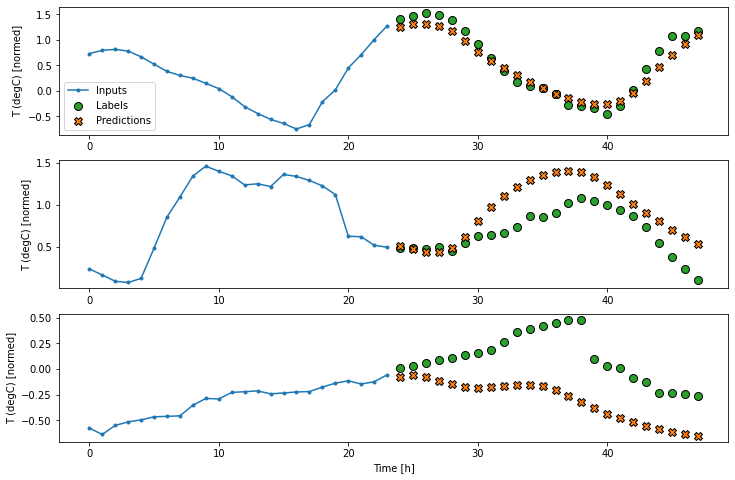

In [84]:
history = compile_and_fit(feedback_model, multi_window)
multi_val_performance = {}
multi_performance = {}
IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [1]:
from datatable import dt, f, g, by, join, sort, update, fread

In [3]:
data = dt.fread("../Data/2018_2022_24.csv")

In [4]:
del data["OP_CARRIER_AIRLINE_ID"]
del data["ORIGIN_AIRPORT_ID"]
del data["ORIGIN_WAC"]
del data["DEST_AIRPORT_ID"]
del data["CARRIER_DELAY"]
del data["WEATHER_DELAY"]
del data["NAS_DELAY"]
del data["SECURITY_DELAY"]
del data["LATE_AIRCRAFT_DELAY"]
del data["CANCELLATION_CODE"]
del data["CANCELLED"]
del data["DEST_WAC"]
del data["DIVERTED"]

In [5]:
data

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,1/26/2018 12:00:00 AM,EWR,ATL,1803,1758,−5,2036,2020,−16,153,746
1,1/26/2018 12:00:00 AM,SFO,ATL,2237,2250,13,620,615,−5,283,2139
2,1/26/2018 12:00:00 AM,ORD,ATL,620,612,−8,916,900,−16,116,606
3,1/26/2018 12:00:00 AM,IAH,ATL,1940,1946,6,2240,2233,−7,120,689
4,1/26/2018 12:00:00 AM,ATL,EWR,1515,1523,8,1735,1725,−10,140,746
5,1/26/2018 12:00:00 AM,ATL,ORD,1720,1712,−8,1835,1827,−8,135,606
6,1/26/2018 12:00:00 AM,ATL,IAD,941,934,−7,1128,1107,−21,107,534
7,1/26/2018 12:00:00 AM,ATL,EWR,1936,1929,−7,2159,2142,−17,143,746
8,1/26/2018 12:00:00 AM,SAV,EWR,1056,1047,−9,1310,1250,−20,134,708


In [6]:
from datetime import datetime

In [7]:
time = []
data.shape[0]
for i in range(data.shape[0]):
    if i%100000 == 0:
        print(i)
    t = datetime.strptime(data[i,"FL_DATE"], '%m/%d/%Y %I:%M:%S %p')
    time.append(t.strftime('%Y-%d-%m'))

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000


In [9]:
import numpy as np

In [10]:
data["date"] = np.array(time)

In [11]:
del data["CRS_DEP_TIME"]
del data["DEP_TIME"]
del data["CRS_ARR_TIME"]
del data["ARR_TIME"]
del data["FL_DATE"]

In [ ]:
# ATL CSG ABY VLD BQK SAV AGS

In [12]:
data

,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,date
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,EWR,ATL,−5,−16,153,746,2018-26-01
1,SFO,ATL,13,−5,283,2139,2018-26-01
2,ORD,ATL,−8,−16,116,606,2018-26-01
3,IAH,ATL,6,−7,120,689,2018-26-01
4,ATL,EWR,8,−10,140,746,2018-26-01
5,ATL,ORD,−8,−8,135,606,2018-26-01
6,ATL,IAD,−7,−21,107,534,2018-26-01
7,ATL,EWR,−7,−17,143,746,2018-26-01
8,SAV,EWR,−9,−20,134,708,2018-26-01


In [13]:
llegada = data[(f.DEST == "ATL") | (f.DEST == "CSG") | (f.DEST == "ABY") | (f.DEST == "VLD") | (f.DEST == "BQK") | (f.DEST == "SAV") | (f.DEST == "AGS"), :]

In [14]:
llegada

,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,date
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,EWR,ATL,−5,−16,153,746,2018-26-01
1,SFO,ATL,13,−5,283,2139,2018-26-01
2,ORD,ATL,−8,−16,116,606,2018-26-01
3,IAH,ATL,6,−7,120,689,2018-26-01
4,IAD,ATL,2,−10,118,534,2018-26-01
5,SFO,ATL,−8,−18,281,2139,2018-26-01
6,EWR,ATL,−10,−21,154,746,2018-26-01
7,EWR,ATL,−5,−26,153,746,2018-26-01
8,ORD,ATL,−2,1,120,606,2018-26-01


In [16]:
llegada=llegada[f.DEST == "ATL",:]

In [21]:
llegada.shape

(1502012, 7)

In [18]:
import matplotlib.pyplot as plt

# Predicción de vuelos con llegada tarde

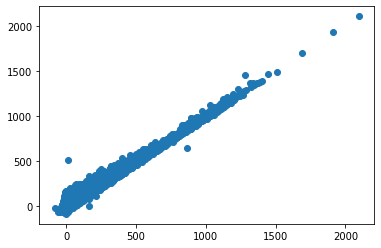

In [19]:
plt.scatter(llegada["DEP_DELAY"], llegada["ARR_DELAY"])

In [22]:
X = llegada["DEP_DELAY"].to_list()
Y = llegada["ARR_DELAY"].to_list()

In [23]:
len(X[0])

1502012

In [68]:
import numpy as np

In [24]:
X1 = X
Y1 = Y
X = []
Y = []
nan = "nan"
print(nan)
for i in range(len(X1[0])):
    if X1[0][i] == None or Y1[0][i] == None:
        pass
    else:
        X.append(X1[0][i])
        Y.append(Y1[0][i])
del X1
del Y1

nan


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from mlinsights.mlmodel import IntervalRegressor

In [ ]:
x = m*x +b
p = x +- cte*f(x)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X).reshape(-1,1), np.array(Y).reshape(-1,1), test_size=0.25, random_state=137)

In [29]:
linear_ransac = RANSACRegressor()
linear_ransac.fit(X_train, Y_train)

RANSACRegressor()

In [168]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, DotProduct, WhiteKernel

In [150]:
X_train.transpose()[0]

array([43., -5.,  0., ..., 20., -3., -5.])

In [174]:
linear_ransac.set_params()

RANSACRegressor()

In [30]:

linear_ransac.score(X_test, Y_test)

0.5058684351581202

In [34]:
print("Coeficientes estimados:")
print(linear_ransac.estimator_.coef_)

Coeficientes estimados:
[[0.35578266]]


In [31]:
test_predictions = linear_ransac.predict(np.array(X).reshape(-1,1))

In [32]:
print("El retraso de despegue es de", X[2003], "minutos")
print("La predicción de retraso de llegada es de", linear_ransac.predict([[X[2003]]])[0][0], "minutos")
print("El real retraso de llegada es de", Y[2003], "minutos")

#linear_ransac.predict([[]])[0][0]

El retraso de despegue es de -5.0 minutos
La predicción de retraso de llegada es de -11.788243835941596 minutos
El real retraso de llegada es de -10.0 minutos


In [143]:
time = []
mean = []
standard = []
for i in range(1,32):
    if i <10:
        fecha="2018-0"+str(i)+"-02"
    else:
        fecha="2018-"+str(i)+"-02"
    print(fecha)
    #print(llegada[f.date == fecha,:].mean()["DEP_DELAY"].to_list()[0][0])
    #print(llegada[f.date == fecha,:].sd()["DEP_DELAY"].to_list()[0][0])
    time.append(i)
    mean.append(llegada[f.date == fecha,:].mean()["DEP_DELAY"].to_list()[0][0])
    standard.append(llegada[f.date == fecha,:].sd()["DEP_DELAY"].to_list()[0][0])

2018-01-02
2018-02-02
2018-03-02
2018-04-02
2018-05-02
2018-06-02
2018-07-02
2018-08-02
2018-09-02
2018-10-02
2018-11-02
2018-12-02
2018-13-02
2018-14-02
2018-15-02
2018-16-02
2018-17-02
2018-18-02
2018-19-02
2018-20-02
2018-21-02
2018-22-02
2018-23-02
2018-24-02
2018-25-02
2018-26-02
2018-27-02
2018-28-02
2018-29-02
2018-30-02
2018-31-02


In [132]:
import matplotlib.pyplot as plt

In [177]:
x=llegada[f.date == "2018-07-02","DEP_DELAY"].to_list()

In [182]:
x=np.array(x).transpose()

In [183]:
print(x)

[[1.0]
 [-4.0]
 [-3.0]
 [57.0]
 [67.0]
 [16.0]
 [12.0]
 [44.0]
 [-2.0]
 [-7.0]
 [44.0]
 [-6.0]
 [24.0]
 [-4.0]
 [-8.0]
 [-4.0]
 [-4.0]
 [35.0]
 [13.0]
 [-6.0]
 [-2.0]
 [-5.0]
 [-3.0]
 [9.0]
 [16.0]
 [-3.0]
 [-5.0]
 [-5.0]
 [-5.0]
 [34.0]
 [-2.0]
 [137.0]
 [-5.0]
 [-3.0]
 [None]
 [-10.0]
 [None]
 [None]
 [None]
 [-7.0]
 [-4.0]
 [42.0]
 [-1.0]
 [-6.0]
 [-1.0]
 [-7.0]
 [61.0]
 [159.0]
 [16.0]
 [9.0]
 [51.0]
 [67.0]
 [-1.0]
 [-8.0]
 [93.0]
 [175.0]
 [169.0]
 [53.0]
 [14.0]
 [62.0]
 [135.0]
 [29.0]
 [7.0]
 [-3.0]
 [65.0]
 [2.0]
 [13.0]
 [6.0]
 [82.0]
 [-5.0]
 [8.0]
 [-6.0]
 [77.0]
 [36.0]
 [-6.0]
 [-8.0]
 [-4.0]
 [231.0]
 [25.0]
 [174.0]
 [61.0]
 [-8.0]
 [-1.0]
 [120.0]
 [-3.0]
 [5.0]
 [-7.0]
 [11.0]
 [121.0]
 [104.0]
 [75.0]
 [117.0]
 [5.0]
 [29.0]
 [744.0]
 [89.0]
 [38.0]
 [-7.0]
 [156.0]
 [-6.0]
 [171.0]
 [-3.0]
 [27.0]
 [3.0]
 [-3.0]
 [47.0]
 [-2.0]
 [19.0]
 [25.0]
 [-10.0]
 [73.0]
 [26.0]
 [-3.0]
 [-6.0]
 [35.0]
 [102.0]
 [89.0]
 [-3.0]
 [171.0]
 [32.0]
 [73.0]
 [19.0]
 [90.0]
 [-6.0]


In [301]:
for i in range(len(x[0])):
    if x[0][i]==None:
        x[0][i] = 0

In [207]:
x[0][]

-3.0

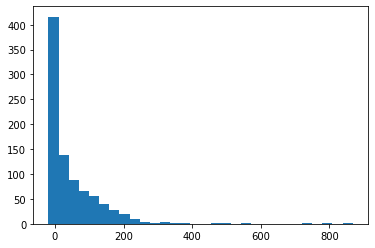

In [216]:
plt.hist(x,bins=30)
plt.show()

In [296]:
x = llegada[f.date == "2018-07-02","DEP_DELAY"].to_list()

In [200]:
cube = []

In [224]:
momento = 0
for i in range(len(x[0])):
    momento+=(x[0][i] - np.mean(x[0]))**3

In [303]:
negativos = 0
positivos = 0
for i in range(len(x[0])):
    if x[0][i] <=0:
        negativos +=1
    else:
        positivos +=1

In [218]:
print(momento)
print(negativos)
print(positivos)

1993476673.46915
330
548


In [226]:
print(momento)
print(negativos)
print(positivos)

231280210.57870418
735
129


In [302]:
sumaraiz = 0+0j
momentoraiz = 0
for i in range(len(x[0])):
    if x[0][i] < 0:
        momentoraiz += (x[0][i])*1j+0
    else:
        momentoraiz += (x[0][i]) + 0j
        

In [315]:
momentoraiz 

(2901-3561j)

In [287]:
positivos*np.sqrt(momentoraiz.real)

94418.74749751767

In [288]:
negativos*np.sqrt(momentoraiz.imag)

113763.65994903646

In [274]:
positivos*np.sqrt(momentoraiz.real)

2882.7344657460217

In [275]:
negativos*np.sqrt(momentoraiz.imag)

95.2732911156112

# Adelantos

In [299]:
(momentoraiz.real-momentoraiz.imag)/(positivos+negativos)

9454.53416856492

# retrasos

In [304]:
(momentoraiz.real-momentoraiz.imag)/(positivos+negativos)

7.479166666666667

$$\frac{sum(positivos)-media(negativos)}{positivos+negativos}$$

$$\frac{positivos*ln(media(positivos))-negativos*ln(-media(negativos))}{positivos+negativos}$$

In [311]:
(positivos*np.log(momentoraiz.real)-negativos*np.log(-momentoraiz.imag))/(positivos+negativos)

-5.76642126279804

In [313]:
np.log(momentoraiz.real)

7.972810784121404

In [314]:
np.log(-momentoraiz.imag)

8.177796683277778

In [ ]:
(positivos*np.log(momentoraiz.real)-negativos*np.log(-momentoraiz.imag))/(positivos+negativos)

In [243]:
momentoraiz

(5017582.617589678+1201309.2742098682j)

In [300]:
x = llegada[f.date == "2018-13-02","DEP_DELAY"].to_list()

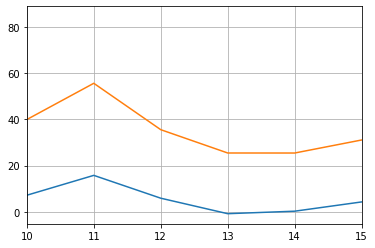

In [219]:
plt.plot(time, mean)
plt.plot(time, standard)
plt.xlim(10,15)
plt.grid()

$$E((x-mean)^3)=\Sigma (x_{i}-mean)^3$$

In [126]:
ida = data[(f.ORIGIN == "ATL") | (f.ORIGIN == "CSG") | (f.ORIGIN == "ABY") | (f.ORIGIN == "VLD") | (f.ORIGIN == "BQK") | (f.ORIGIN == "SAV") | (f.ORIGIN == "AGS"), :]

In [127]:
ida

,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,date
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,ATL,EWR,8,−10,140,746,2018-26-01
1,ATL,ORD,−8,−8,135,606,2018-26-01
2,ATL,IAD,−7,−21,107,534,2018-26-01
3,ATL,EWR,−7,−17,143,746,2018-26-01
4,SAV,EWR,−9,−20,134,708,2018-26-01
5,ATL,EWR,2,−9,135,746,2018-26-01
6,ATL,EWR,−13,−19,138,746,2018-26-01
7,ATL,SFO,−12,−14,327,2139,2018-26-01
8,ATL,ORD,−5,−17,127,606,2018-26-01
